In [1]:

import numpy as np                                              
import pandas as pd                                             
import nltk                                                     
import matplotlib.pyplot as plt                                
import seaborn as sns                                          
import re
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer    
from sklearn.naive_bayes import MultinomialNB                  
from sklearn.model_selection import cross_val_predict           
import translators as ts
from nltk import word_tokenize





Using state Provincia del Canar server backend.


In [2]:
import nltk 

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mecad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\mecad\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mecad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mecad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
order_reviews=pd.read_csv('Datasets\olist_order_reviews_dataset.csv', sep=',' ,decimal= ',', thousands= '.', encoding= 'UTF-8')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
#order_reviews=pd.read_csv('Datasets\cleaned_datasets\olist-order-reviews-cleaned.csv', sep=';' ,decimal= ',', thousands= '.', encoding= 'UTF-8')
#order_reviews.head()

In [6]:
round(order_reviews.isna().mean()*100,2)

review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.34
review_comment_message     58.70
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

In [7]:
order_reviews['review_comment_title']=order_reviews['review_comment_title'].fillna('no data')
order_reviews['review_comment_message']=order_reviews['review_comment_message'].fillna('no data')

In [8]:
order_reviews[(order_reviews['review_comment_title']!='no data')|(order_reviews['review_comment_message']!='no data')].shape

(42706, 7)

In [9]:
order_reviews=order_reviews.drop(['review_comment_title'],axis=1)

In [10]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no data,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no data,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no data,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
df_resp=order_reviews[order_reviews['review_comment_message']!='no data']
comments=df_resp[['order_id','review_comment_message','review_score']]

comments.shape
#comments.reset_index(inplace=True)
comments.head()

,order_id,review_comment_message,review_score
3,658677c97b385a9be170737859d3511b,Recebi bem antes do prazo estipulado.,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,Parabéns lojas lannister adorei comprar pela I...,5
9,b9bf720beb4ab3728760088589c62129,aparelho eficiente. no site a marca do aparelh...,4
12,9d6f15f95d01e79bd1349cc208361f09,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,e51478e7e277a83743b6f9991dbfa3fb,"Vendedor confiável, produto ok e entrega antes...",5


In [12]:
comments['review_type'] = comments['review_score'].apply(lambda x: 'negative' if x < 3 else ('neutral' if x==3 else 'positive'))


C:\Users\mecad\AppData\Local\Temp\ipykernel_22904\1813166629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['review_type'] = comments['review_score'].apply(lambda x: 'negative' if x < 3 else ('neutral' if x==3 else 'positive'))


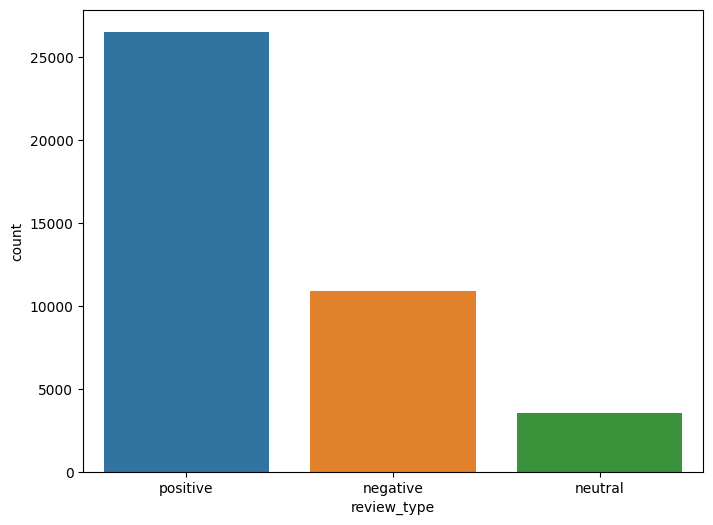

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x=comments['review_type'])
plt.show()

In [17]:
comments.head()

,order_id,review_comment_message,review_score,review_type
3,658677c97b385a9be170737859d3511b,Recebi bem antes do prazo estipulado.,5,positive
4,8e6bfb81e283fa7e4f11123a3fb894f1,Parabéns lojas lannister adorei comprar pela I...,5,positive
9,b9bf720beb4ab3728760088589c62129,aparelho eficiente. no site a marca do aparelh...,4,positive
12,9d6f15f95d01e79bd1349cc208361f09,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,positive
15,e51478e7e277a83743b6f9991dbfa3fb,"Vendedor confiável, produto ok e entrega antes...",5,positive


In [19]:
def Preprocessing(text):
    stemmer = nltk.stem.RSLPStemmer()
    text = text.lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.remove('não')
    stopwords.remove('nem')
    words = [stemmer.stem(i) for i in text.split() if not i in stopwords]
    return (" ".join(words))


In [20]:
messages=comments.review_comment_message
classes=comments.review_type

In [21]:
messages = [Preprocessing(i) for i in messages]

In [23]:
messages[:50]

['receb bem ant praz estipul',
 'parabém loj lannist ador compr internet segur prát parabém tod feliz pásco',
 'aparelh efici sit marc aparelh impress 3desinfec cheg outr nomeatual marc corret vez aparelh',
 'pouc ,travandopel val ta boa',
 'vend confiável, produt ok entreg ant praz',
 'gost sab houve, sempr receb compr agor decpcion',
 'péss',
 'loj not 10',
 'obrig atença amim dispens',
 'compr realiz facil entreg efetu ant praz dad produt começ us presente, problem',
 'relógi bonit barat',
 'não gost ! compr gat lebr',
 'sempr compr internet entreg ocorr ant praz combinado, acredit praz máx stark praz máx esgot aind não receb produt',
 'receb exat esper demal encomend outr vend atrasaram, cheg praz',
 'recom ,',
 'boa',
 'tô complet apaixonada, loj sup respons confiável!',
 'nad cheg ped',
 'bom cheir',
 'otim vend cheg ate ant praz , ador produt',
 'process compr tranquil efici',
 'tom q dur poi pel',
 'receb soment 1 control mide split estil falt control remot ar condicion consul'

In [25]:
from nltk.tokenize import TweetTokenizer

In [30]:
message_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer=message_tokenizer.tokenize, max_features=5000)
freq_messages = vectorizer.fit_transform(messages)
freq_messages.shape

(40977, 5000)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(freq_messages, classes, test_size=0.3, random_state = 10)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
def metrics(y_true, y_pred):
  print("Accuracy: ", round(accuracy_score(y_true, y_pred),2))
  print("\nF1-Score:", round(f1_score(y_true, y_pred, average='weighted'),2))
  print("\nConfusion matrix.:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

c:\Users\mecad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_reglog_pred = reglog.predict(X_test)

Accuracy:  0.84

F1-Score: 0.82

Confusion matrix.:


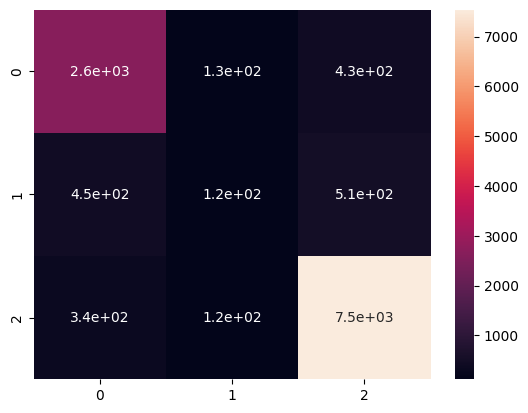

In [44]:
metrics(y_test, y_reglog_pred)

MultinomialNB

In [40]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [41]:
y_mnb_pred = mnb.predict(X_test)

Accuracy:  0.82

F1-Score: 0.81

Confusion matrix.:


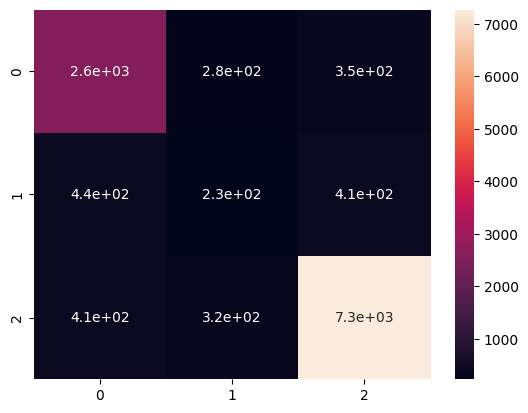

In [45]:
metrics(y_test, y_mnb_pred)

Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()



In [47]:
rf1.fit(X_train, y_train)



RandomForestClassifier()

Accuracy:  0.84

F1-Score: 0.81

Confusion matrix.:


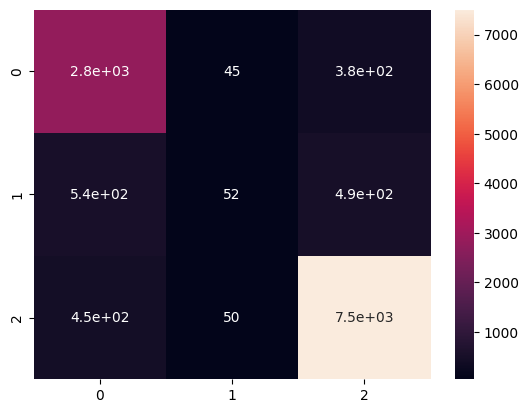

In [48]:
y_rf_pred = rf1.predict(X_test)

metrics(y_test, y_rf_pred)

In [50]:
for t, c in zip (comments.review_comment_message, mnb.predict(freq_messages)):
    print (t +", "+ c)

Recebi bem antes do prazo estipulado., positive
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa, positive
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho, neutral
Mas um pouco ,travando...pelo valor ta Boa.
, positive
Vendedor confiável, produto ok e entrega antes do prazo., positive
GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU, negative
Péssimo, negative
Loja nota 10, positive
obrigado pela atençao amim dispensada, positive
A compra foi realizada facilmente.
A entrega foi efetuada muito antes do prazo dado.
O produto já começou a ser usado e até o presente,
sem problemas., positive
relógio muito bonito e barato., positive
Não gostei ! Comprei gato por lebre, negative
Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No 

### Traduction

In [51]:
example=comments[:100]

In [52]:
suma=0
for i in comments['review_comment_message']:
    suma=suma+len(i)

print(suma)

2812566


In [53]:
example['english_example']=example['review_comment_message'].apply(lambda x: ts.translate_text(x,'google'))
example.head()

C:\Users\mecad\AppData\Local\Temp\ipykernel_22904\791906220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['english_example']=example['review_comment_message'].apply(lambda x: ts.translate_text(x,'google'))


,order_id,review_comment_message,review_score,review_type,english_example
3,658677c97b385a9be170737859d3511b,Recebi bem antes do prazo estipulado.,5,positive,I received well before the deadline.
4,8e6bfb81e283fa7e4f11123a3fb894f1,Parabéns lojas lannister adorei comprar pela I...,5,positive,Congratulations Lannister Stores I loved buyin...
9,b9bf720beb4ab3728760088589c62129,aparelho eficiente. no site a marca do aparelh...,4,positive,Efficient apparatus. On the site the brand of ...
12,9d6f15f95d01e79bd1349cc208361f09,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,positive,"But a little, crashing ... for the value is good."
15,e51478e7e277a83743b6f9991dbfa3fb,"Vendedor confiável, produto ok e entrega antes...",5,positive,"Reliable seller, product OK and delivery befor..."


In [ ]:
'''
def print_wordcloud(data, background_cor):
    words = ' '.join(data)
    wordcloud = WordCloud(background_color=background_cor,
                          width=2000,
                          height=1000
                          ).generate(words)
    plt.figure(1, figsize=(11, 11))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    '''

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [55]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mecad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
sia = SentimentIntensityAnalyzer()

In [59]:
example['sentiment']=example['english_example'].apply(lambda x: sia.polarity_scores(x)['compound'] )

C:\Users\mecad\AppData\Local\Temp\ipykernel_22904\2299365812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['sentiment']=example['english_example'].apply(lambda x: sia.polarity_scores(x)['compound'] )


In [60]:
example.head()

,order_id,review_comment_message,review_score,review_type,english_example,sentiment
3,658677c97b385a9be170737859d3511b,Recebi bem antes do prazo estipulado.,5,positive,I received well before the deadline.,0.2732
4,8e6bfb81e283fa7e4f11123a3fb894f1,Parabéns lojas lannister adorei comprar pela I...,5,positive,Congratulations Lannister Stores I loved buyin...,0.9601
9,b9bf720beb4ab3728760088589c62129,aparelho eficiente. no site a marca do aparelh...,4,positive,Efficient apparatus. On the site the brand of ...,0.4215
12,9d6f15f95d01e79bd1349cc208361f09,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,positive,"But a little, crashing ... for the value is good.",0.7876
15,e51478e7e277a83743b6f9991dbfa3fb,"Vendedor confiável, produto ok e entrega antes...",5,positive,"Reliable seller, product OK and delivery befor...",0.4466


In [ ]:
example['sentiment']=example['english_example'].apply(lambda x: sia.polarity_scores(x)['compound'] )